<a href="https://colab.research.google.com/github/AliWindsor/Road-Sign-Image-Classification-Model/blob/main/ImageClassification_ModelTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Used CNN and Image Classification tutorials on tensorflow as a starting point.
#You can download the zip file for the dataset here: https://drive.google.com/file/d/11I5pDQnr-MDRZWrLEYpSNfjArvtgW15n/view?usp=sharing

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from google.colab import drive 

#The below two lines need to be uncommented prior to running this code cell for the first time.
drive.mount('/content/drive')
!unzip -q "drive/My Drive/roadsign_photos.zip"

data_dir_train = "roadsign_photos/Train"
data_dir_train = pathlib.Path(data_dir_train)

test_data = "roadsign_photos/Test"
test_data = pathlib.Path(test_data)
testImg = list(test_data.glob('*.png'))



Mounted at /content/drive


In [3]:
#Dataset

#Parameters
batch_size = 32
img_height = 180
img_width = 180

#Training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Class Names
class_names=train_ds.class_names
print(class_names)

Found 39419 files belonging to 43 classes.
Using 31536 files for training.
Found 39419 files belonging to 43 classes.
Using 7883 files for validation.
['100_speed', '120_speed', '20_speed', '30_speed', '50_speed', '60_speed', '70_speed', '80_speed', 'ahead_only', 'ahead_or_left', 'ahead_or_right', 'ahead_traffic_light', 'ahead_turn_left', 'ahead_turn_right', 'animals', 'bend_double', 'bend_left', 'bend_right', 'caution', 'caution_snow', 'children ', 'crossroads_ahead', 'cyclists', 'no_entry', 'no_overtaking', 'no_overtaking_end', 'no_overtaking_trucks', 'no_overtaking_trucks_end', 'no_power_driven', 'pass_left', 'pass_right', 'pedestrians', 'priority_road', 'prohibited', 'road_narrows_right', 'road_works', 'roundabout', 'slippery_when_wet', 'speed_limit_end', 'stop', 'uneven_road', 'yield', 'zone_restriction_end']


In [12]:
#No overfitting used as dataset is large

num_classes = len(class_names)

tsi_model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height,img_width,3)),
  layers.Conv2D(16,(3), activation='relu'), #layers.Conv2D(filters , kernal size, activation)
  layers.MaxPooling2D(),
  layers.Conv2D(32,(3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,(3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3), activation='relu'),
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
tsi_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 32)       

In [14]:
tsi_epochs=10

tsi_model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tsi_history = tsi_model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=tsi_epochs)

Epoch 1/10
986/986 [==============================] - 814s 824ms/step - loss: 1.7232 - accuracy: 0.5286 - val_loss: 0.2753 - val_accuracy: 0.9202
Epoch 2/10
986/986 [==============================] - 807s 818ms/step - loss: 0.2108 - accuracy: 0.9408 - val_loss: 0.1489 - val_accuracy: 0.9580
Epoch 3/10
986/986 [==============================] - 807s 819ms/step - loss: 0.1092 - accuracy: 0.9683 - val_loss: 0.1142 - val_accuracy: 0.9690
Epoch 4/10
986/986 [==============================] - 812s 823ms/step - loss: 0.0772 - accuracy: 0.9780 - val_loss: 0.0911 - val_accuracy: 0.9786
Epoch 5/10
986/986 [==============================] - 814s 825ms/step - loss: 0.0592 - accuracy: 0.9831 - val_loss: 0.1286 - val_accuracy: 0.9690
Epoch 6/10
986/986 [==============================] - 805s 816ms/step - loss: 0.0534 - accuracy: 0.9850 - val_loss: 0.1452 - val_accuracy: 0.9641
Epoch 7/10
986/986 [==============================] - 799s 810ms/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.0801 -

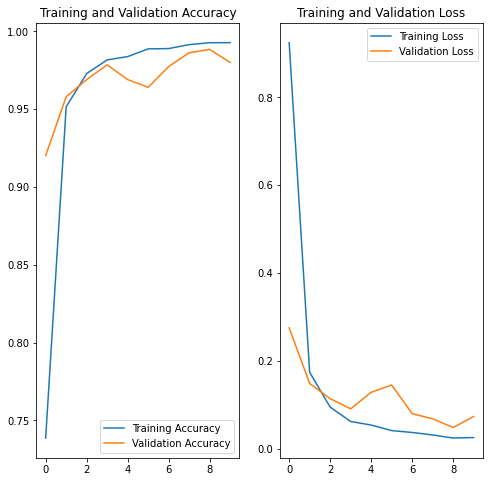

In [15]:
acc = tsi_history.history['accuracy']
val_acc = tsi_history.history['val_accuracy']

loss = tsi_history.history['loss']
val_loss = tsi_history.history['val_loss']

epochs_range = range(tsi_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 158.09375, 'Predicted label')

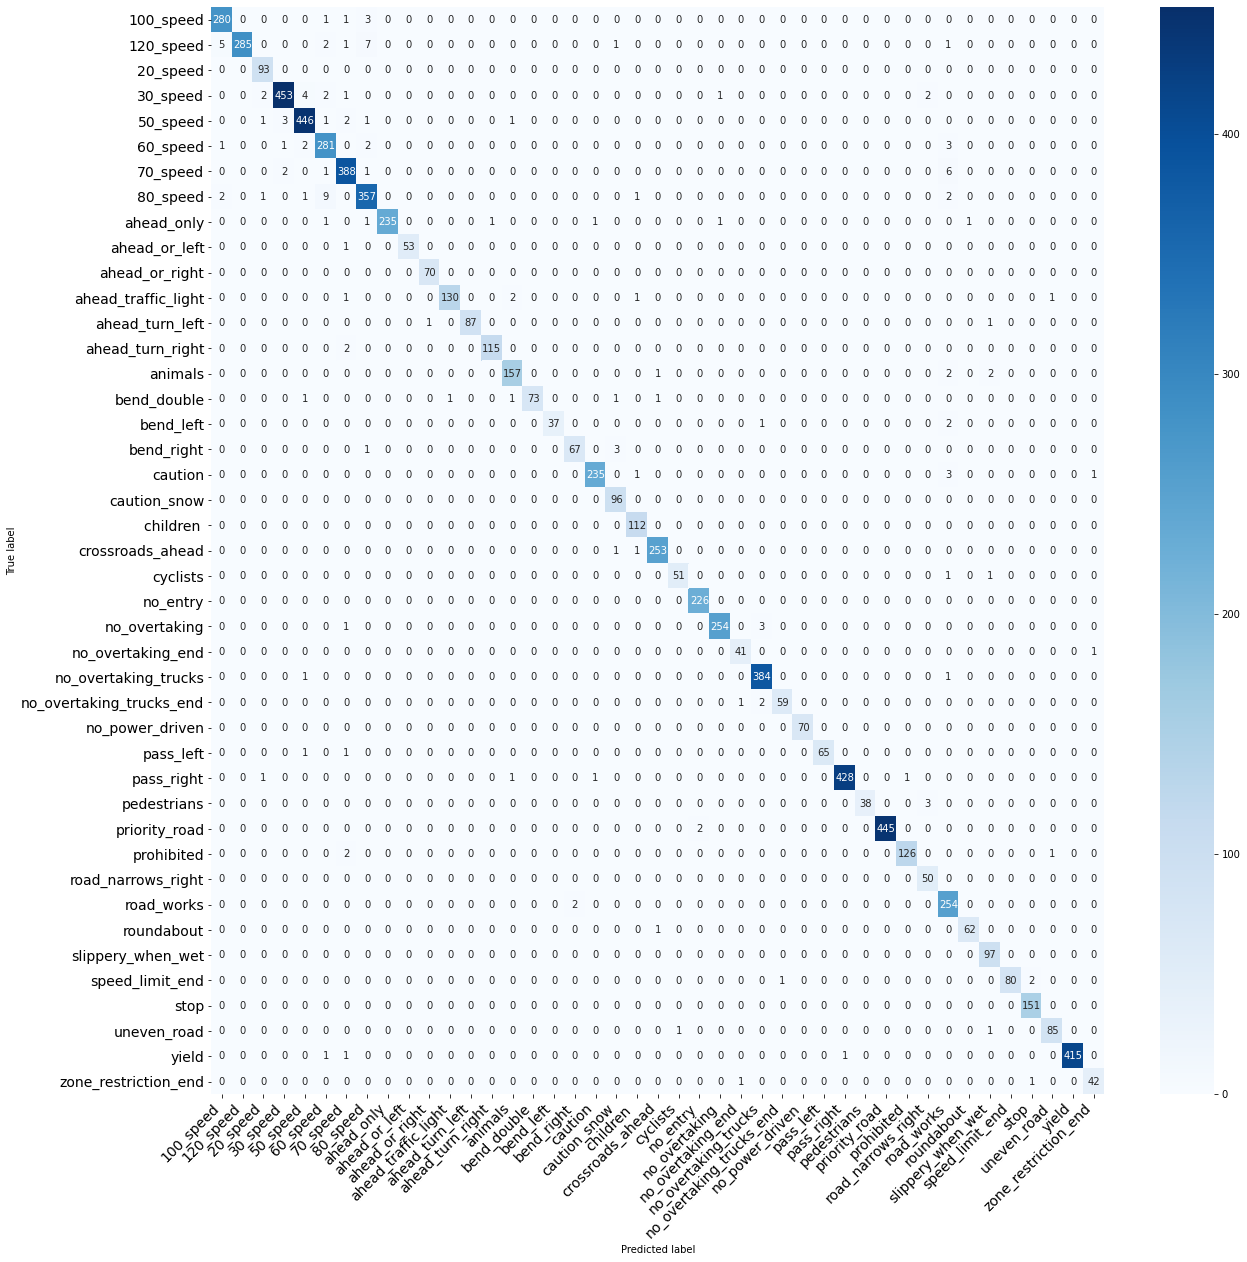

In [16]:
from string import ascii_uppercase
from pandas import DataFrame
import seaborn as sn
from sklearn.metrics import confusion_matrix

predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
  predictions = np.concatenate([predictions, np.argmax(tsi_model2.predict(x),  axis=-1)])
  labels = np.concatenate([labels, y.numpy()])

figsize = (20,20)
fontsize= 14
columns = [class_names[0:len(np.unique(labels))]]

confm = confusion_matrix(labels, predictions)
df_cm = DataFrame(confm, index=columns, columns=columns)

fig = plt.figure(figsize=figsize)

heatmap = sn.heatmap(df_cm, annot=True, fmt="d", cmap = "Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

plt.ylabel('True label')
plt.xlabel('Predicted label')

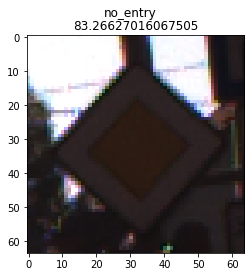

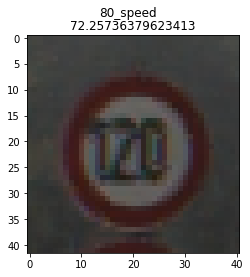

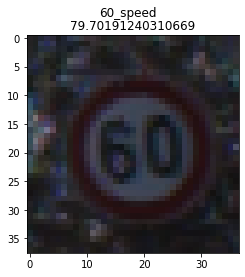

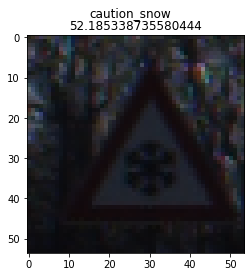

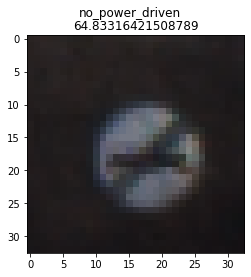

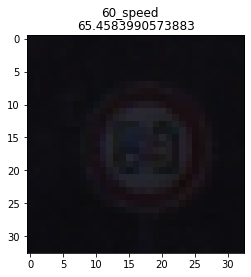

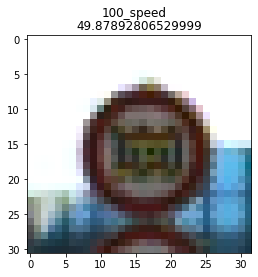

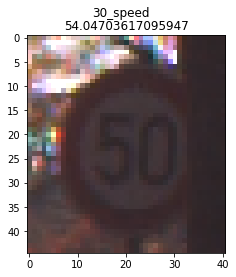

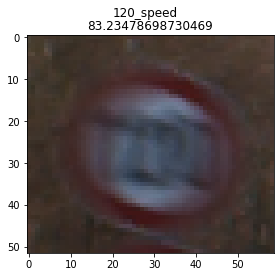

Text(0.5, 1.0, 'Unlabed Testing Results')

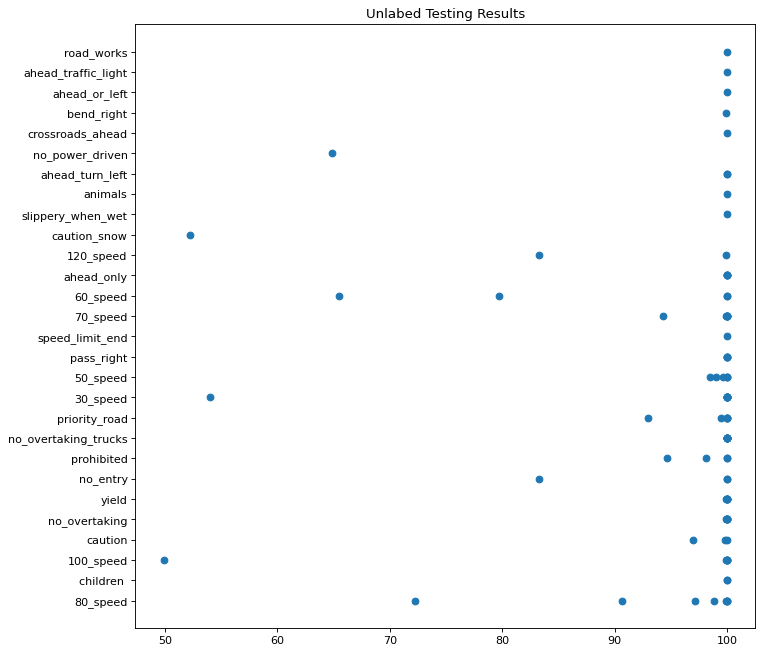

In [17]:
import matplotlib.image as mpimg

arr_name = []
arr_score = []

for i in range(100):

  img = keras.preprocessing.image.load_img(
        testImg[i], target_size=(img_height, img_width))
      
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions2 = tsi_model2.predict(img_array)
  score = tf.nn.softmax(predictions2[0])

  predictionScore = 100 * np.max(score)
  predictionName = class_names[np.argmax(score)]

  arr_name.append(predictionName)
  arr_score.append(predictionScore)

  if predictionScore <= 90:
    img = mpimg.imread(str(testImg[i]))
    imgplot = plt.imshow(img)
    plt.title(predictionScore)
    plt.suptitle(predictionName)
    plt.show()
plt.figure(figsize=(10, 10), dpi=80) 
plt.scatter(arr_score, arr_name)
plt.title("Unlabed Testing Results")

In [18]:
import sklearn as sk
print (sk.metrics.precision_score(labels, predictions, average="weighted"))
print (sk.metrics.recall_score(labels, predictions, average="weighted"))
print (sk.metrics.f1_score(labels, predictions, average="weighted"))


0.9805405219125937
0.9800837244703793
0.9801287385356111
